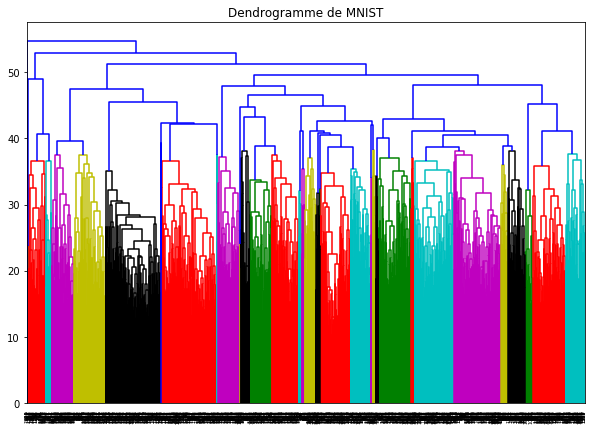

In [41]:
from time import time
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn import manifold, datasets
from scipy import ndimage
import scipy.cluster.hierarchy as shc

digits = datasets.load_digits()
mnist = digits.data
targets = digits.target
#creer le dendrogramme
plt.figure(figsize=(10,7))
plt.title("Dendrogramme de MNIST")
dend = shc.dendrogram(shc.linkage(mnist, method='average'))

Temps de calcul : 0.07 secondes
Score V-mesure : 0.5867965626325482
Score de precision : 0.042292710072342796
Score silhouette : 0.24068754324486422


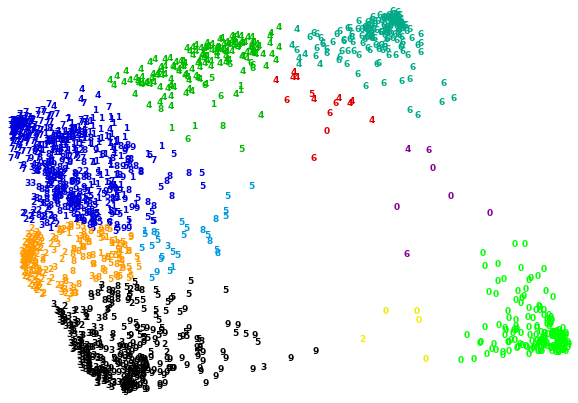

In [75]:
from sklearn.cluster import AgglomerativeClustering
#Creer matrice de similarite avec les donnees de mnist
mnist_matrix = manifold.SpectralEmbedding(n_components=2).fit_transform(mnist)

#Creer le cluster
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='average')
t0 = time()
cluster.fit(mnist_matrix)

#Calculer temps de calcul
temps = time() - t0
print("Temps de calcul :", round(temps,2), "secondes")

#Normalization du dataset
mnist_min, mnist_max = np.min(mnist_matrix, axis=0), np.max(mnist_matrix, axis=0)
mnist_matrix = (mnist_matrix - mnist_min) / (mnist_max - mnist_min)

#Afficher le cluster
plt.figure(figsize=(10,7))
for i in range(mnist_matrix.shape[0]):
    plt.text(mnist_matrix[i, 0], mnist_matrix[i, 1], str(targets[i]),
    color=plt.cm.nipy_spectral(cluster.labels_[i] / 10.),
    fontdict={'weight': 'bold', 'size': 9})

plt.axis('off')

#Calculer score v-mesure
from sklearn.metrics.cluster import v_measure_score
print("Score V-mesure :", v_measure_score(targets,cluster.labels_))

#Calculer score de precision
from sklearn.metrics import precision_score
print("Score de precision :", precision_score(targets, cluster.labels_, average='micro'))

#Calculer score silhouette
from sklearn.metrics import silhouette_score
print("Score silhouette :", silhouette_score(mnist_matrix, targets))